# Explorando los datos de clutter

Para este ejemplo usaremos los datos recolectados de clutter durante un período de condiciones libres de precipitación. Esto nos permitirá conocer la naturaleza y distribución de los mismos. 

Para ello comenzaremos importando algunas librerías:

In [2]:
from pathlib import Path
import wradlib as wrl
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

Importamos un módulo propio para leer los datos(este constituye una envoltura sobre la función de lectura de wradlib).

In [3]:
import Bases_GUI as radar

Configuramos la ruta en la cual se encuentran los archivos:

In [4]:
ruta = 'C:\Python37\Clutter'

Definimos una pequeña función para devolver los archivos en el directorio.

In [5]:
def files(ruta=Path.cwd()):
    """Devuelve una lista con los nombres de los archivos contenidos en la ruta especificada. Dicha lista no esta filtrada.
    Argumentos :
        ruta (pathlib.WindowsPath/str) Directorio o carpeta del cual se extraen los archivos
    Salidas:
        list_name (list)   Lista con los nombres relativos de los archivos. La extensión está incluida. """
    list_name = [arch.name for arch in Path(ruta).iterdir() if arch.is_file()]
    return list_name

Y otra para verificar que los archivos dentro del directorio sean válidos. 

In [6]:
def valids(lista):
    """Función de comprobación de los archivos de entrada. Devuelve una lista conn los elementos que presentan el formato .azi
    Argumentos:
        lista (list) Lista con las cadenas de caracteres a evaluar
    Salidas:
        list_valid  (list) Lista de las cadenas que terminan en .azi """
    list_valid = []
    for element in lista:
        if element.endswith('.azi'):
            list_valid.append(element)
    return list_valid

In [7]:
list_name = files(ruta)
list_valid = valids(list_name)

In [8]:
print('\nAnálisis de Clutter')
print('Número de archivos:', len(list_name))
print('Número de archivos válidos:', len(list_valid))
    


Análisis de Clutter
Número de archivos: 63
Número de archivos válidos: 63


Creamos una pequeña función para leer los datos:

In [9]:
def dataclass(ruta, list_relfile='Easter egg'):
    """Función para transformar una lista de nombres de archivos en objetos de la clase Radardata
    Argumentos:
        ruta (str) Cadena correspondiente al directorio
        list_relfile (list) Lista de cadenas de caracteres que corresponden a los nombres relativos 
                            de los archivos del directorio
    Salidas:
        clutterdata (list) Lista con los objetos tipo Radardata de la ruta especificada. 
    En caso no se proporcione la lista, está se obtendra a partir de la ruta proporcionada"""
    if list_relfile == 'Easter egg':
        list_relfile = valids(files(ruta))
    clutterdata = []
    for rel_name in list_relfile:
        abs_name = ruta + '/' + rel_name
        clutterdata.append(radar.read_data(abs_name))
    return clutterdata

In [10]:
clutterdata = dataclass(ruta)

La lista clutterdata contiene todos los objetos RadarData del directorio. Veremos que datos hemos seleccionado ... 

In [11]:
    print('\nFechas y horas de los datos seleccionados:')
    print('Hora local')
    for clutter in clutterdata:
        clutter.set_fecha()
        print(clutter.local_time)


Fechas y horas de los datos seleccionados:
Hora local
2019-05-02 16:50:00
2019-05-02 17:00:00
2019-05-02 17:05:00
2019-05-02 17:10:00
2019-05-02 17:15:00
2019-05-02 17:20:00
2019-05-03 12:55:00
2019-05-03 13:00:00
2019-05-03 13:05:00
2019-05-03 13:10:00
2019-05-03 16:00:00
2019-05-03 16:05:00
2019-05-03 16:10:00
2019-05-03 16:15:00
2019-05-03 16:20:00
2019-05-03 16:25:00
2019-06-19 19:00:00
2019-06-19 19:05:00
2019-06-19 19:10:00
2019-06-19 19:15:00
2019-06-19 19:20:00
2019-06-19 19:25:00
2019-06-19 19:30:00
2019-06-19 19:35:00
2019-06-19 19:40:00
2019-06-19 19:45:00
2019-06-19 19:50:00
2019-06-19 19:55:00
2019-06-19 20:00:00
2019-06-19 20:05:00
2019-06-19 20:10:00
2019-06-19 20:15:00
2019-06-19 20:20:00
2019-06-19 20:25:00
2019-06-19 20:30:00
2019-06-19 20:35:00
2019-06-19 20:40:00
2019-06-19 20:45:00
2019-06-19 20:50:00
2019-06-19 20:55:00
2019-06-19 21:00:00
2019-06-19 21:05:00
2019-06-19 21:10:00
2019-06-19 21:15:00
2019-06-19 21:20:00
2019-06-19 21:25:00
2019-06-19 21:30:00
2019-

Abrimos uno de los datos como ejemplo:

In [12]:
data = clutterdata[6].data['data']

In [13]:
azi = clutterdata[6].data['azi']
r = clutterdata[6].data['range']

Los datos se encuentran en formato polar, especificamente en una matriz de dimensiones (360,1000).

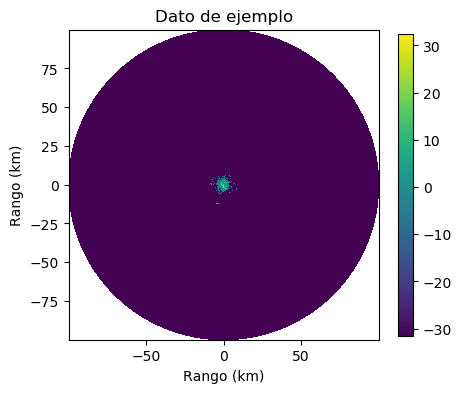

In [14]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax, pm = wrl.vis.plot_ppi(data, az=azi, r=r, fig=fig)
plt.title('Dato de ejemplo')
plt.xlabel('Rango (km)')
plt.ylabel('Rango (km)')
plt.colorbar(pm, shrink = 0.8)
plt.show()

Como te darás cuenta, el tamaño es demasiado pequeño para poder visualizar la concentración de clutter en las cercanías del radar.

(-20, 20)

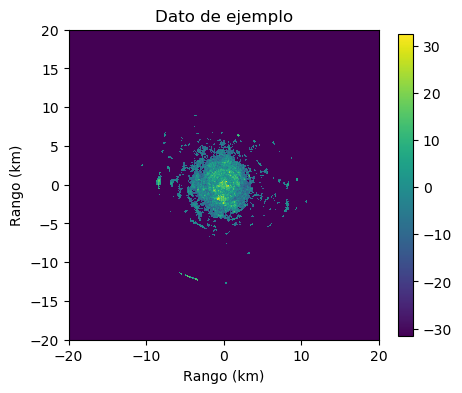

In [15]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax, pm = wrl.vis.plot_ppi(data, az=azi, r=r, fig=fig)
plt.title('Dato de ejemplo')
plt.xlabel('Rango (km)')
plt.ylabel('Rango (km)')
plt.colorbar(pm, shrink = 0.8)
plt.xlim(-20,20)
plt.ylim(-20,20)

En el siguiente cuaderno veremos como a partir de la data importada se pueden elaborar diversos cluttermap de manera sencilla.